TABLE OF CONTENT- EDA
1. MOUNTING DRIVE AND LOADING THE CSV FILE
2. 7 DATA QUESTIONS
3. HANDLING MISING VALUES
4. UNIVARIATE ANALYSIS
5. BIVARIATE ANALYSIS
6. MULTI VARITE ANALYSIS


**IMPORTING PANDAS LIBRARY AND LOADING THE CSV FILE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("/content/drive/MyDrive/A1-fyp2- churn/telecom customer churn.csv")
#df.head()

**ASKING THE 7 MANDATORY QUESTIONS**

In [ ]:
#df.head() #first records
#df.tail() #last records
#df.sample(5) #random data
#df.shape #size
#df.info() #datatype
#df.isnull().sum()# shows null values
#df.describe() #decribes the data
#df.duplicated().sum() #shows duplicted values
#df.corr() #correlation

**data processing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#dropping the identifier column
df.drop("customerID", axis=1 ,inplace =True)

In [ ]:
#df.dtypes

In [ ]:
#while looking at the data the total charges is not shown as a numerical feature
#converting the data to numerals

#pd.to_numeric(df.TotalCharges)

In [ ]:
#identifying error states that some values have spaces in the values so we re using coerce => If the data null will put NAN instead of raise error
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**HANDLING MISSSING VALUES**

In [ ]:
#at the beginning there were no null values but after identifying the error removing the error values and replacing them with null vlaues now the data has been changed
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


We found 11 null values in the 'TotalCharges' column.

 if Total Charges is missing, one of the reason may be because, the tenure is '0'. Because:

**Total Charges = Tenure * Monthly Charges**

Hence, let's look at the tenure value of the missing Total Charges.

In [ ]:
missing_rows = df[df['TotalCharges'].isnull()]
missing_rows['tenure']

,tenure
488,0
753,0
936,0
1082,0
1340,0
3331,0
3826,0
4380,0
5218,0
6670,0


In [ ]:
df.loc[(df['TotalCharges'].isnull()) & (df['tenure'] == 0), 'TotalCharges'] = 0.0

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**EDA(Exploratory Data Analysis)**



UNIVARITE ANALYSIS

seperating the numerical and catgorical values

In [ ]:
categorical_vars = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for vars in categorical_vars:
    print(df[vars].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

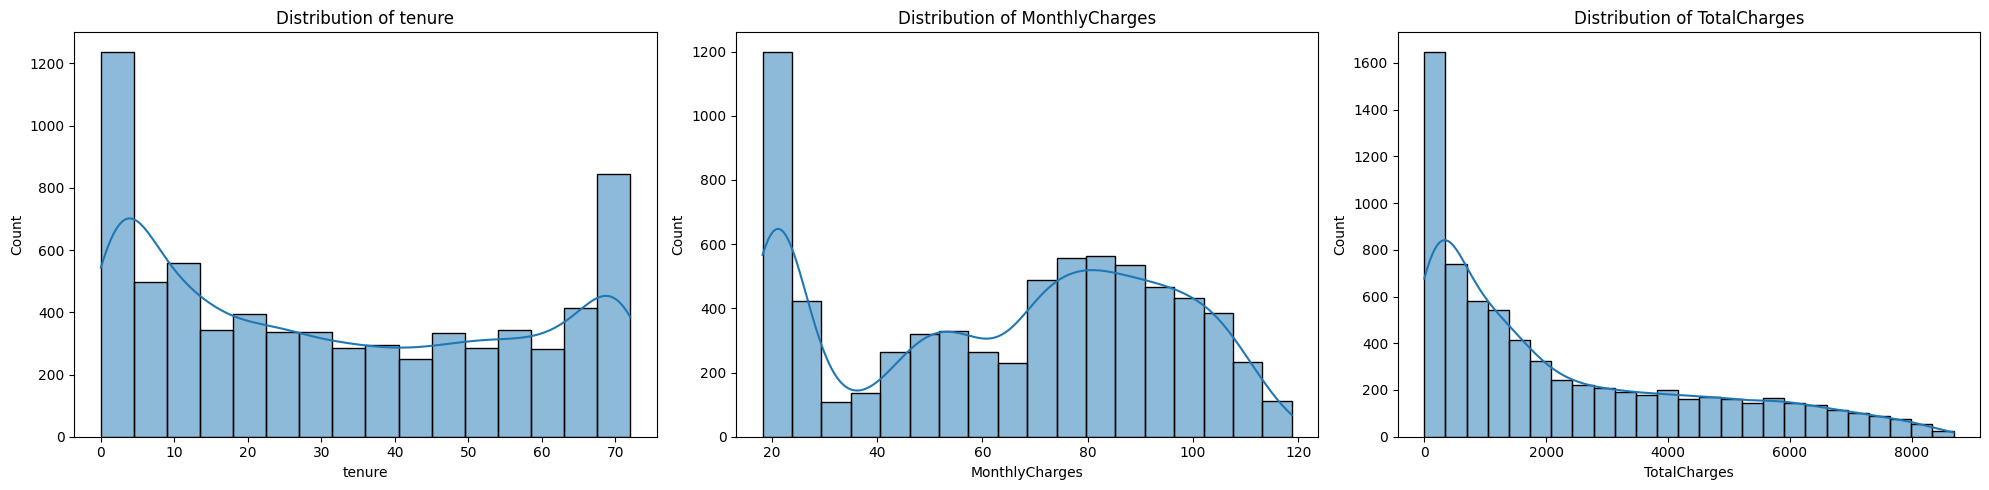

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

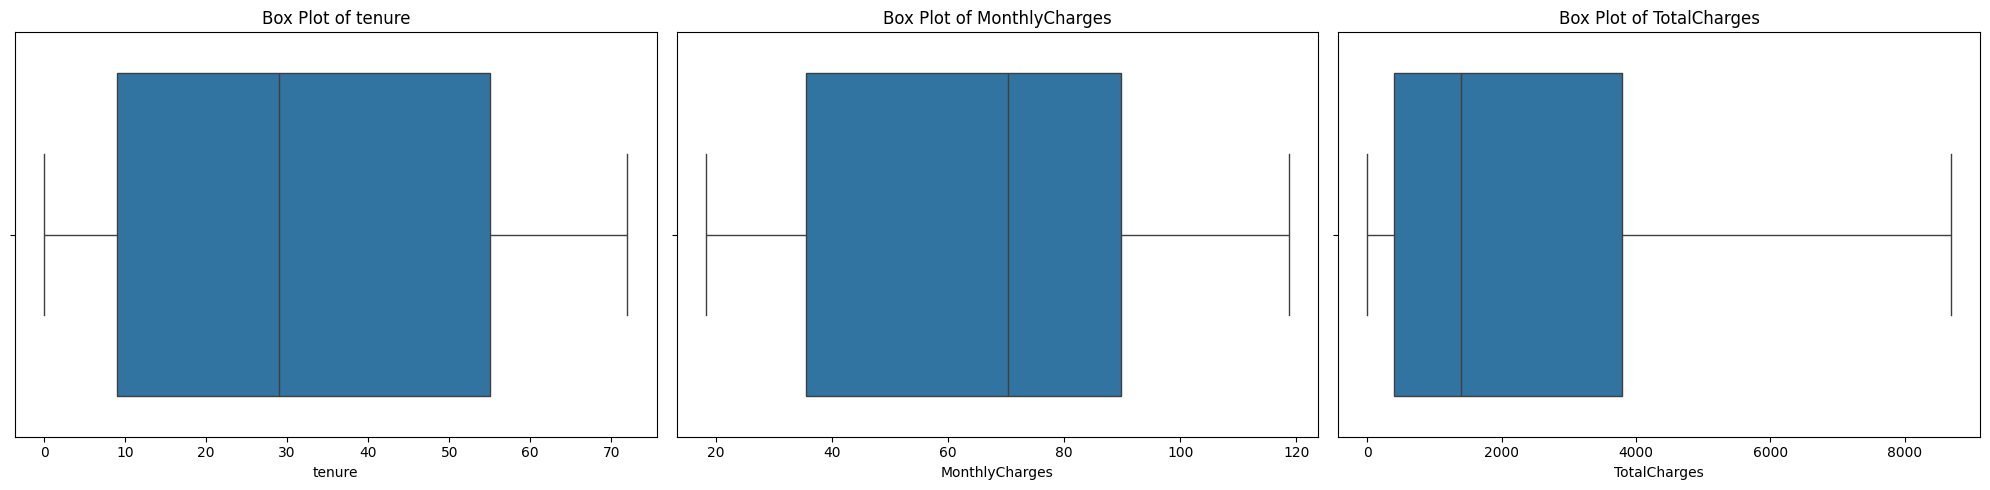

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [ ]:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

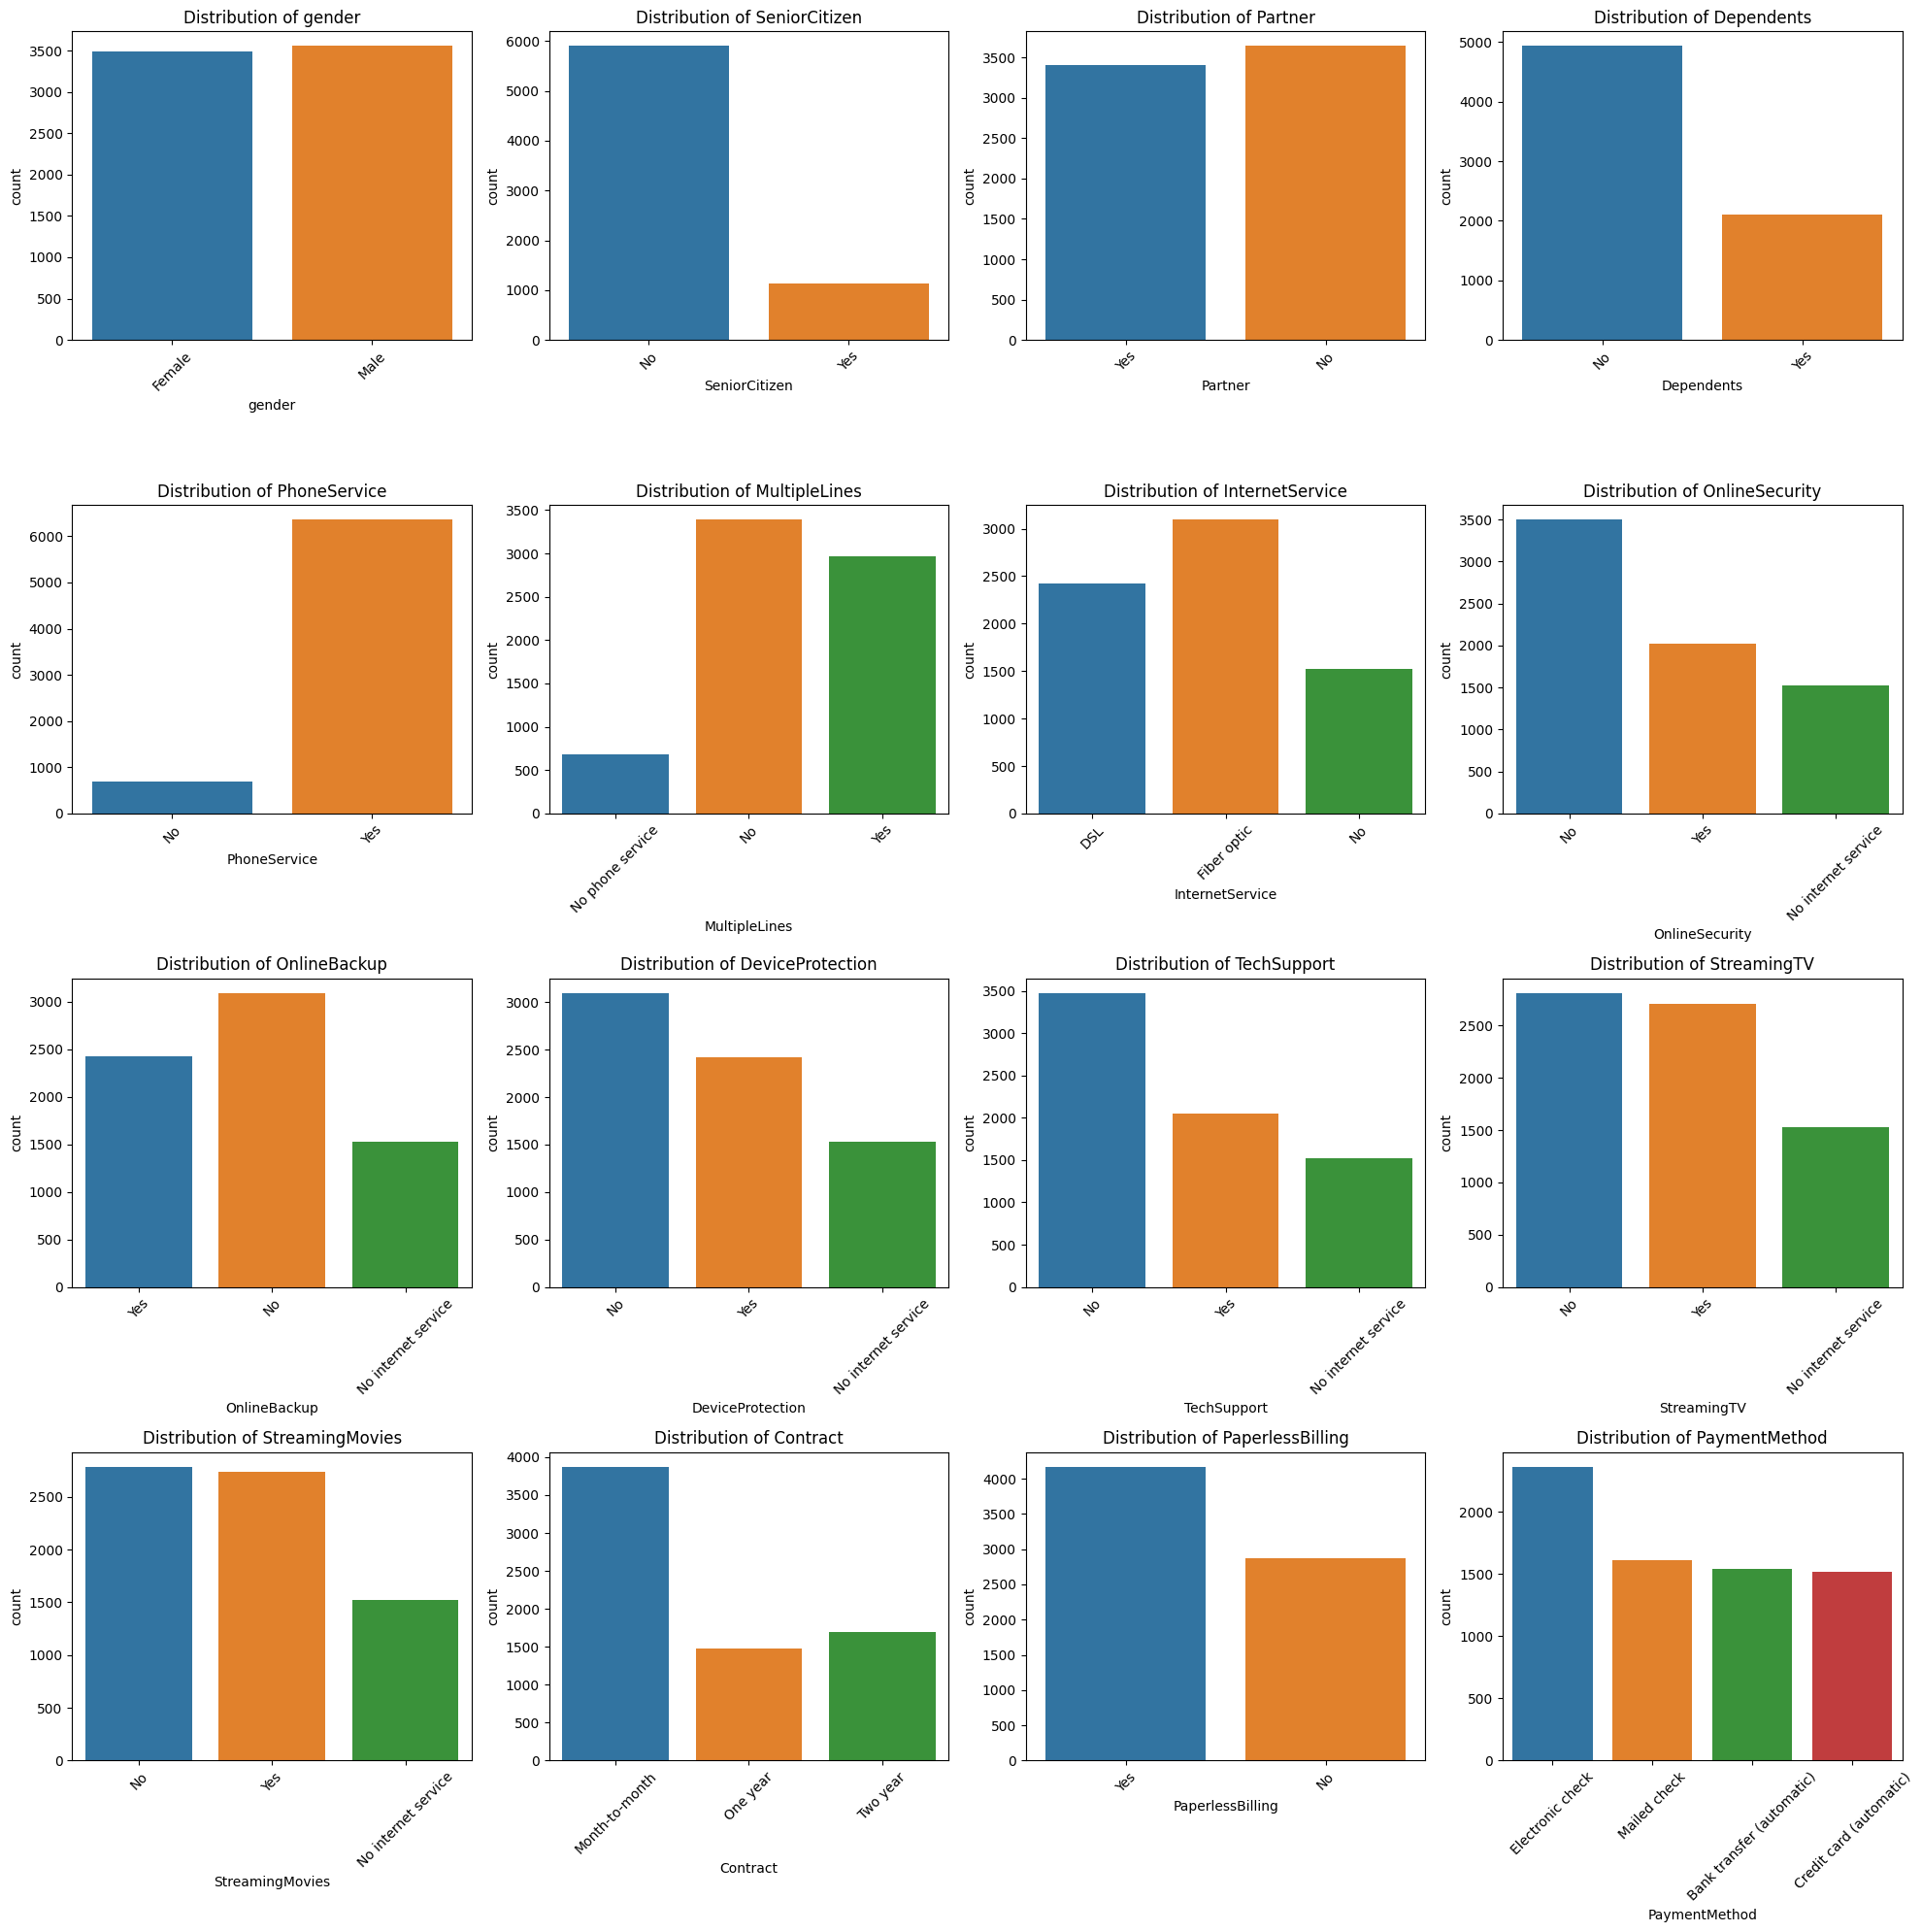

In [ ]:

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()
for i, var in enumerate(categorical_vars):

    sns.countplot(x=var, data=df, ax=axes[i],hue=var)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#Encoding target variable for analysis
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) #Converting Churn into Numerical


bi-ivariate analysis

**visualization with target varaible**


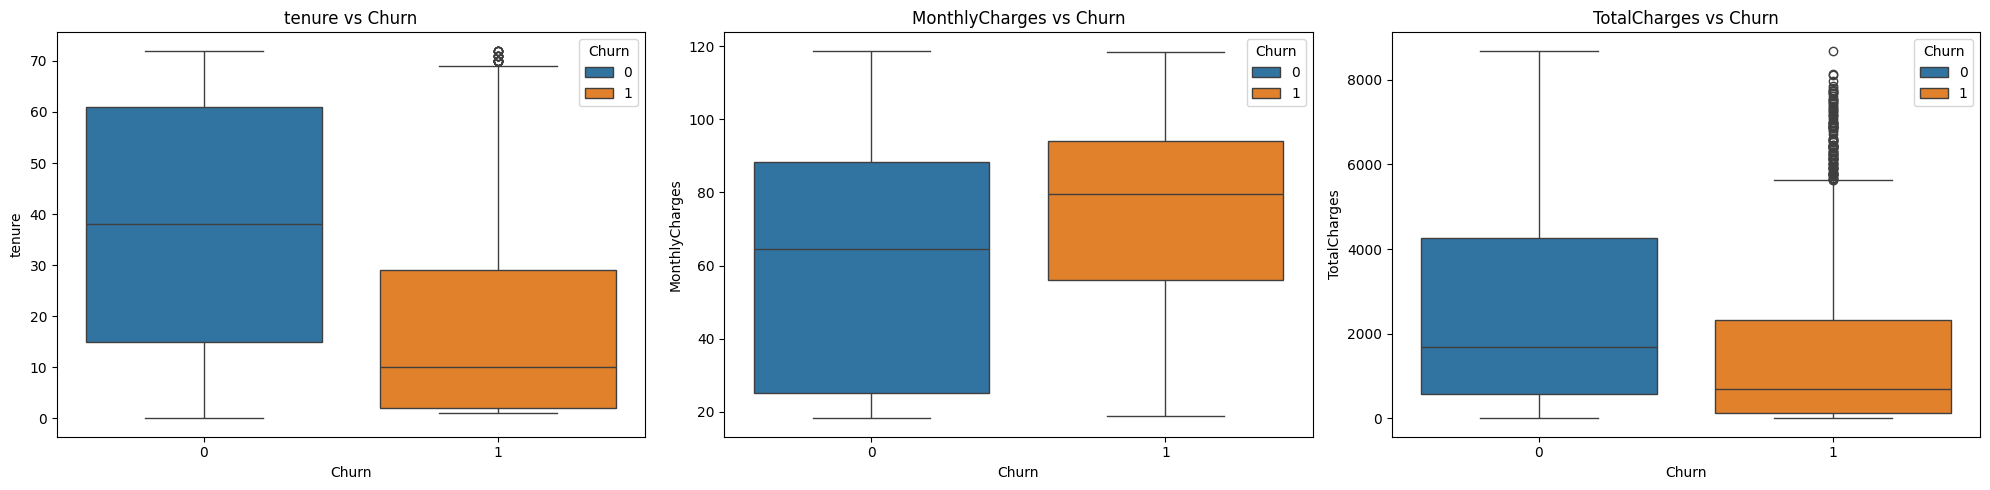

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Churn', hue='Churn', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
plt.tight_layout()
plt.show()

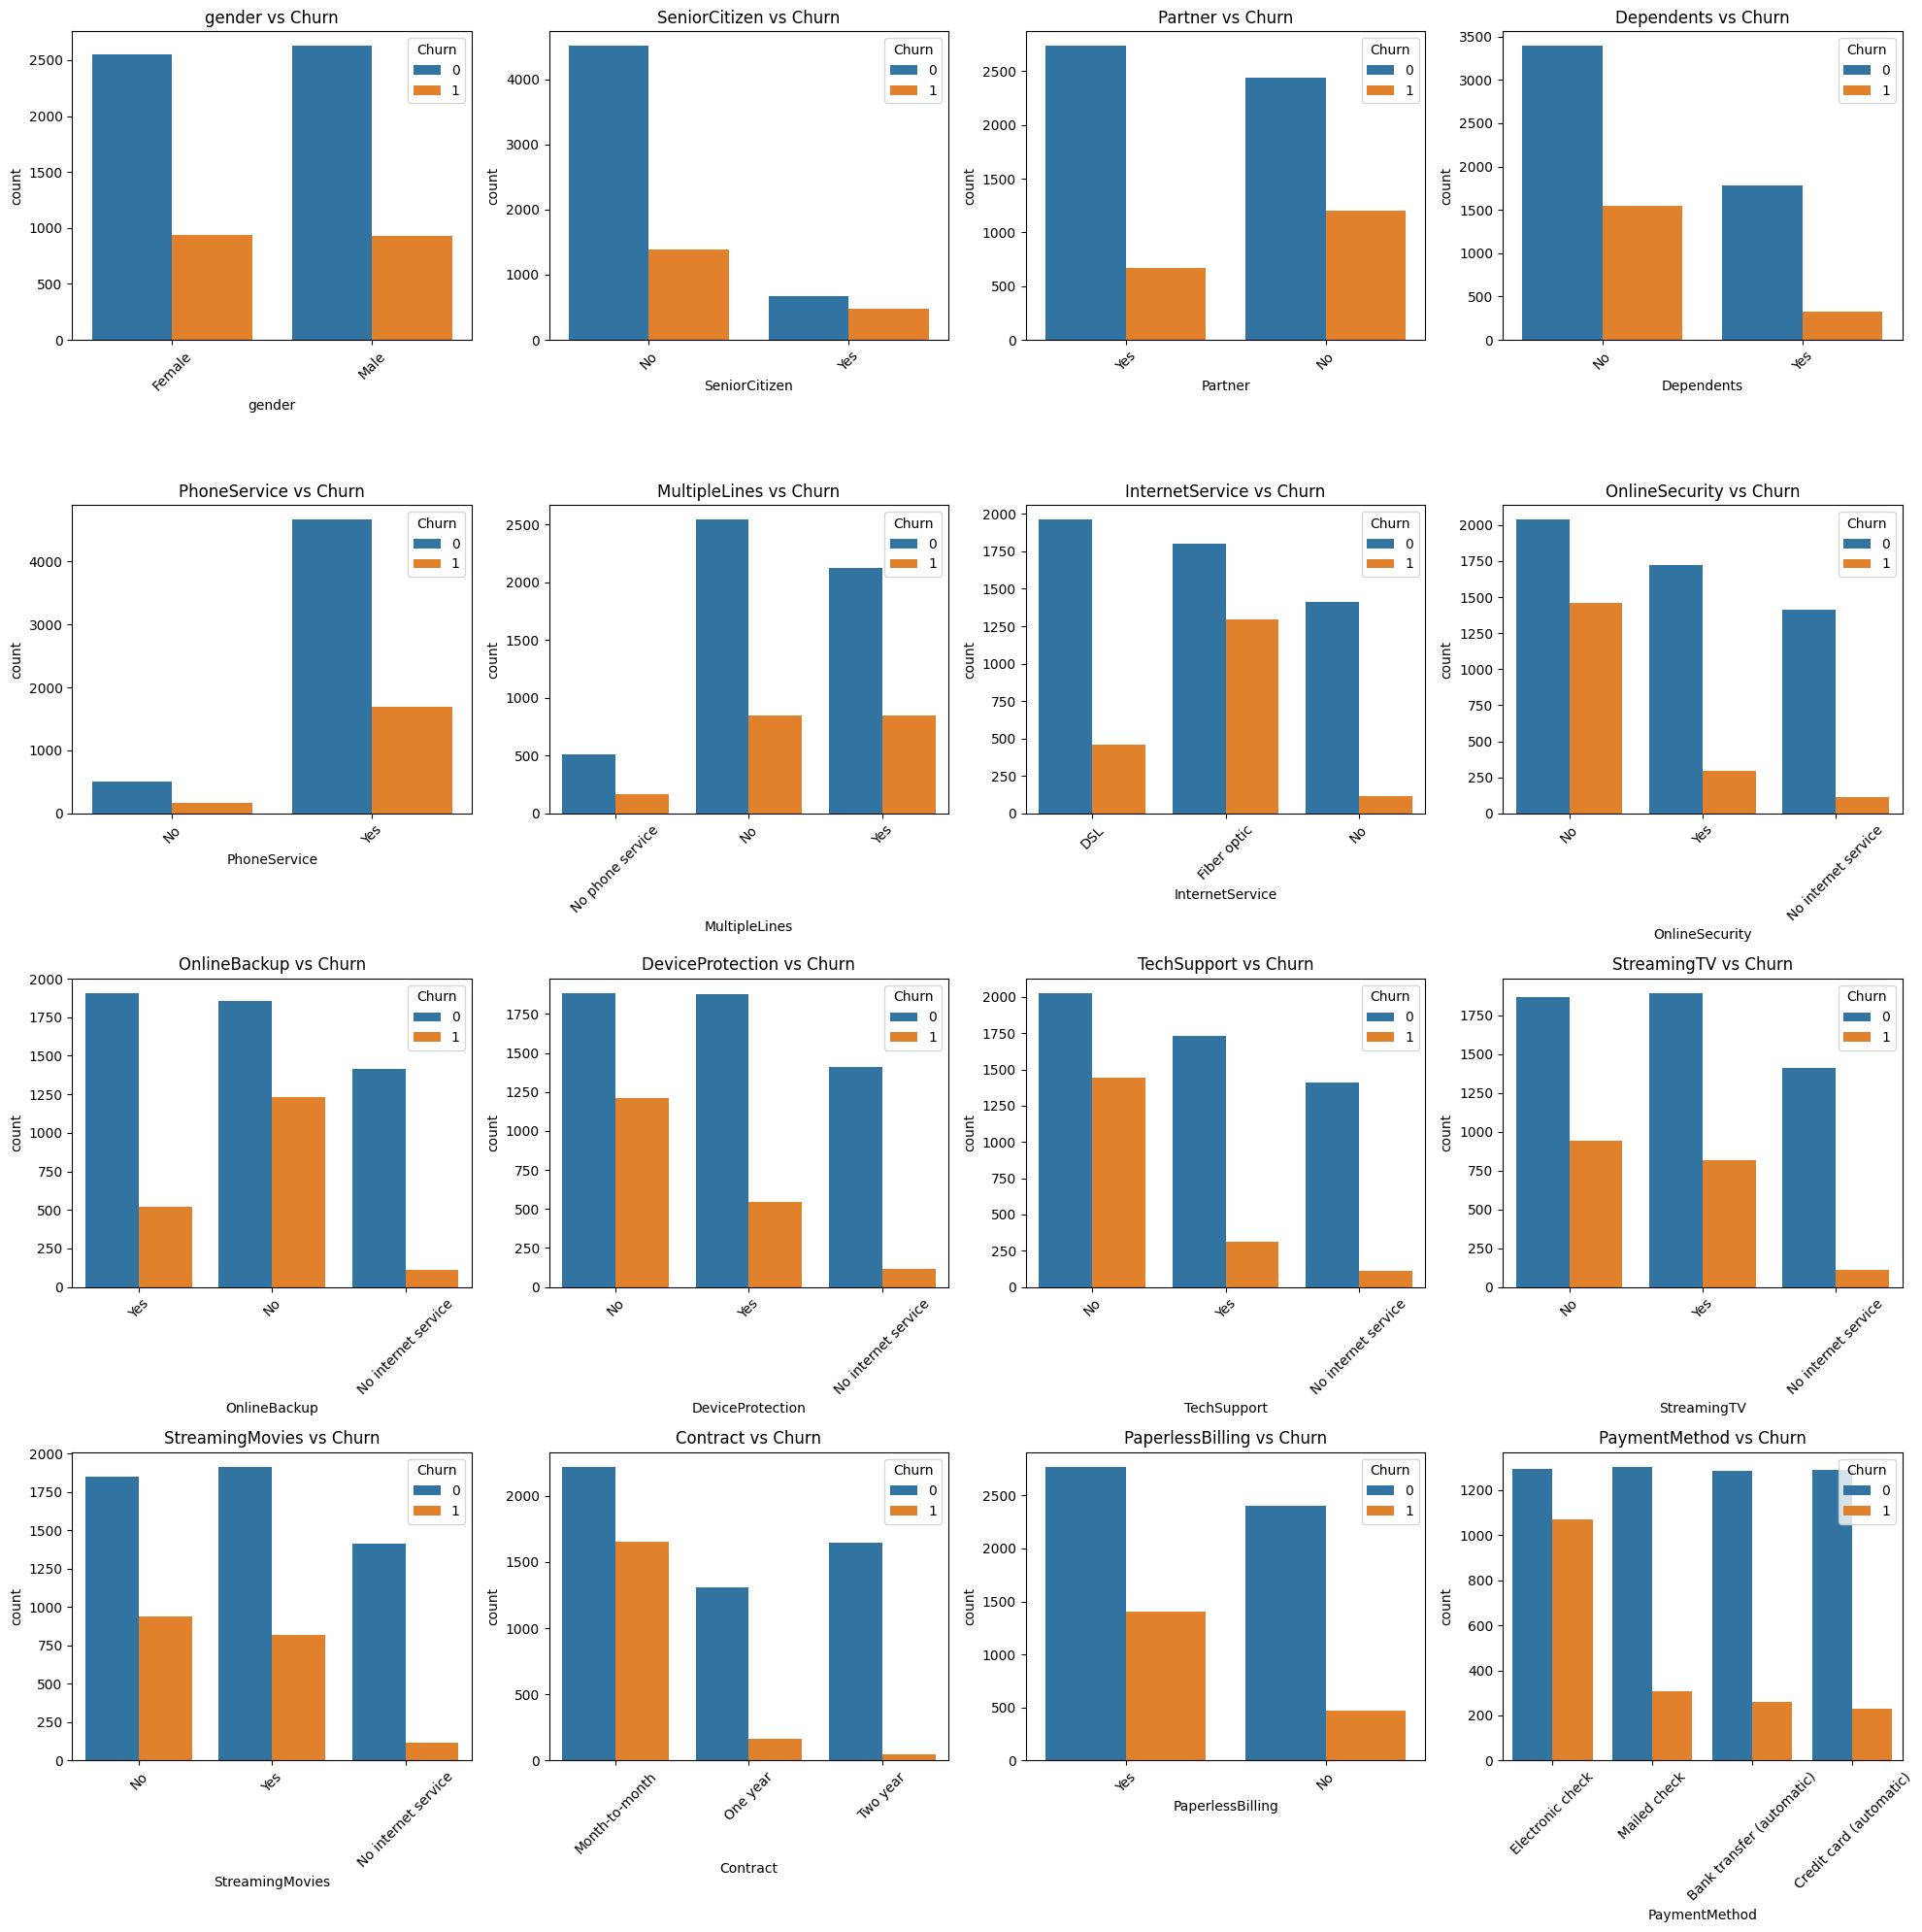

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

multivariate analysis

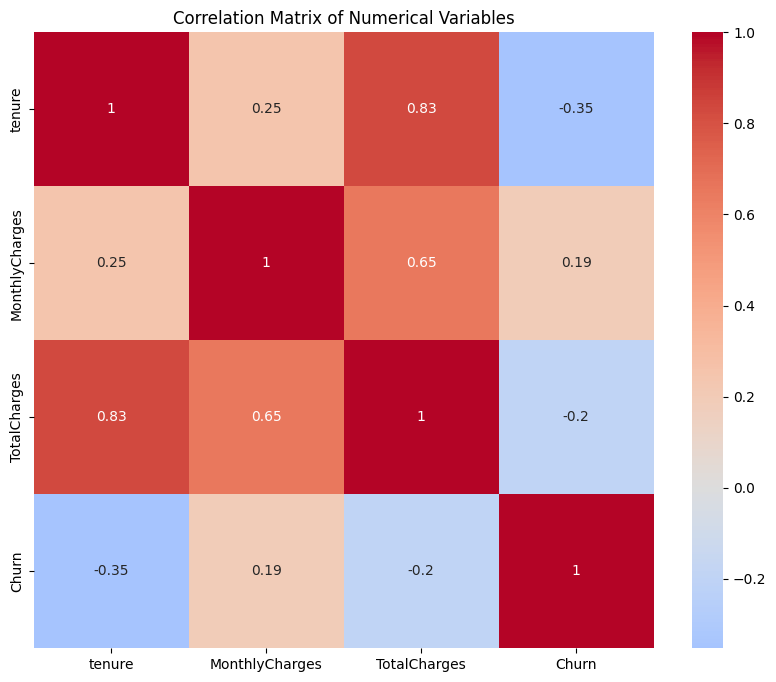

In [ ]:
corr_matrix = df[numerical_vars + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:

# Assuming 'df' is your DataFrame
file_path = '/content/drive/MyDrive/A1-fyp2- churn/EDA_PROCESSED'  # Choose your desired file path
df.to_csv(file_path, index=False)  # Save the DataFrame to a CSV file
print(f"DataFrame saved to: {file_path}")


DataFrame saved to: /content/drive/MyDrive/A1-fyp2- churn/EDA_PROCESSED


In [ ]:
df['CLV'] = df['tenure'] * df['MonthlyCharges']

In [ ]:
df.shape

(7043, 21)

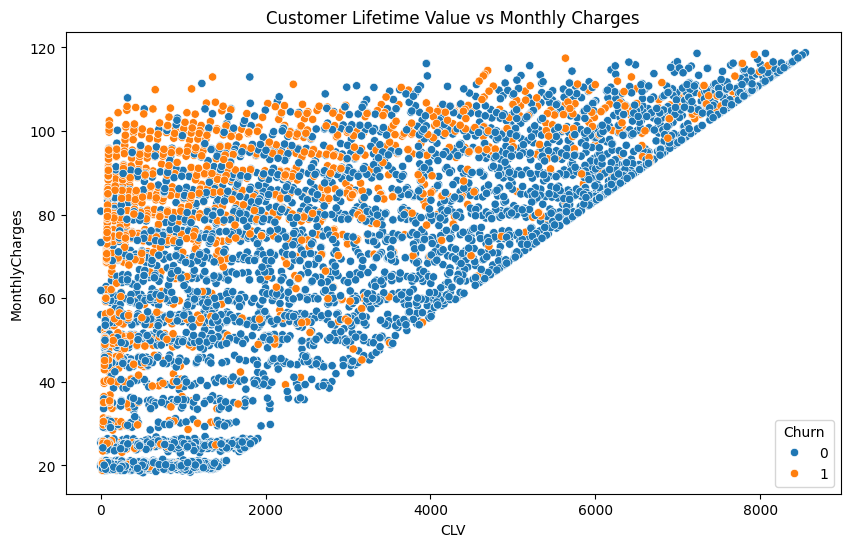

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Customer Lifetime Value vs Monthly Charges')
plt.show()

Domain Knowledge : Churn Rate Analysis
Here, we know in this project, the Churn Rate may be very much affected by its "Contract type" and the "Tenure".

So, Let's have a look at their relationship.

In [ ]:
df['TenureBin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years'])


What's happening:
pd.cut(): This function is used to segment and sort values into discrete bins (i.e., categories). In this case, it is categorizing the tenure column into different year groups (bins).

df['tenure']: Refers to the tenure column in your DataFrame, which likely represents how long a customer has been with a service (in months or years).

bins=[0, 12, 24, 36, 48, 60, np.inf]: The bins argument defines the edges of the intervals (or categories) into which the tenure values will fall:

0 to 12: customers with tenure between 0 and 12 months (0-1 year).
12 to 24: customers with tenure between 1-2 years.
24 to 36: customers with tenure between 2-3 years.
36 to 48: customers with tenure between 3-4 years.
48 to 60: customers with tenure between 4-5 years.
60 to np.inf: customers with tenure greater than 5 years (np.inf means infinity).
labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']: This assigns human-readable labels to each bin. For example, a tenure between 0 and 12 months will be labeled as '0-1 Year'.

Result: The code creates a new column, TenureBin, where each tenure value is categorized into one of the bins defined by the bins argument and labeled accordingl

In [ ]:
churn_by_contract_tenure = df.groupby(['Contract', 'TenureBin'], observed=False)['Churn'].mean().unstack()


In [ ]:
df.shape

(7043, 22)

In [ ]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CLV,TenureBin
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.85,0-1 Year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,1936.30,2-3 Years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,107.70,0-1 Year
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1903.50,3-4 Years
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,141.40,0-1 Year


<Figure size 1200x600 with 0 Axes>

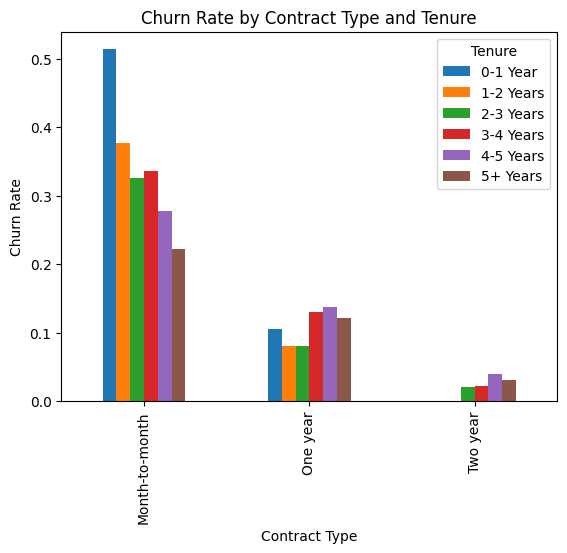

In [ ]:
plt.figure(figsize=(12, 6))
churn_by_contract_tenure.plot(kind='bar', stacked=False)
plt.title('Churn Rate by Contract Type and Tenure')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure')
plt.show()

In [ ]:
df.shape

(7043, 22)